In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Image

In [2]:
img = cv2.imread('s.jpg', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('s.jpg', cv2.IMREAD_COLOR)

In [3]:
img.shape

(1024, 1280)

# Displaying the Image

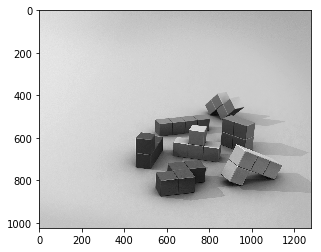

In [4]:
plt.imshow(img, cmap='gray')
plt.show()

# Resizing

In [5]:
small_img = cv2.resize(img, (28,28))

<function matplotlib.pyplot.show>

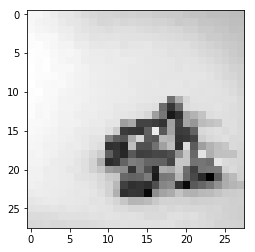

In [6]:
plt.imshow(small_img, cmap='gray')
plt.show

# Some data augmentation methods:
# Rotating, Flipping, Make it wavy, 

In [7]:
# Flipping a image
hor_img = cv2.flip(small_img, 1) # 0 for vertical

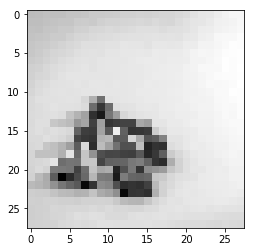

In [8]:
plt.imshow(hor_img, cmap = 'gray')

In [9]:
# Cropping the image
crp_img = small_img[10:, 7:]

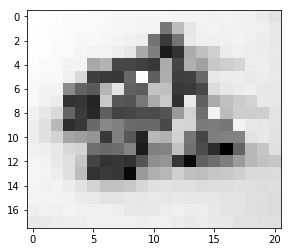

In [10]:
plt.imshow(crp_img, cmap = 'gray')

# MNIST

In [11]:
data = pd.read_csv('mnist_train.csv')

In [12]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Creating the data portions
X = data.drop(['label'], axis=1)
Y = data.label

In [14]:
# Convert Pandas Dataframe to Numpy array
X = X.as_matrix()
Y = Y.as_matrix()

In [15]:
X.shape

(42000, 784)

In [16]:
# Creating a sample image
sample_img = X[0]

In [17]:
# Resizing the image... 
sample_img = sample_img.reshape(28, 28)

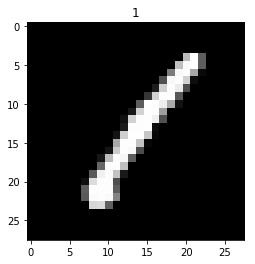

In [18]:
plt.imshow(sample_img, cmap = 'gray')
plt.title(Y[0])
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Training and testing data created
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 32)

In [21]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB().fit(X_train, Y_train)
clf_GNB.score(X_test, Y_test)

0.56702380952380949

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier().fit(X_train, Y_train)
clf_KNN.score(X_test, Y_test)

0.96571428571428575

In [23]:
#from sklearn.svm import SVC
#clf_SVM = SVC().fit(X_train, Y_train)
#clf_SVM.score(X_test, Y_test)

In [24]:
#from sklearn.linear_models import LogisticRegression
#clf_Log = LogisticRegression().fit(X_train, Y_train)
#clf_Log.score(X_test, Y_test)

In [25]:
# Test data added
test_data = pd.read_csv('mnist_test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Predicting from test data
pred_KNN = clf_KNN.predict(test_data)

In [27]:
# Formatting and putting it to .csv file for Kaggle submission
df = pd.DataFrame(pred_KNN)
df.index.name='ImageId'
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results.csv', header=True)